In [7]:
    import tensorflow as tf
    print(tf.__version__)

2.5.0


In [8]:
    !wget --no-check-certificate \
      https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/messy-vs-clean-room.zip \
      -O /tmp/messy_vs_clean_room.zip

--2021-07-24 17:15:28--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/messy-vs-clean-room.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 70392746 (67M) [application/zip]
Saving to: ‘/tmp/messy_vs_clean_room.zip’

/tmp/messy_vs_clean 100%[===================>]  67.13M  8.59MB/s    in 9.9s    

2021-07-24 17:15:39 (6.76 MB/s) - ‘/tmp/messy_vs_clean_room.zip’ saved [70392746/70392746]



In [9]:
    # melakukan ekstraksi pada file zip
    import zipfile,os
    local_zip = '/tmp/messy_vs_clean_room.zip'
    zip_ref = zipfile.ZipFile(local_zip, 'r')
    zip_ref.extractall('/tmp')
    zip_ref.close()
     
    base_dir = '/tmp/images'
    train_dir = os.path.join(base_dir, 'train')
    validation_dir = os.path.join(base_dir, 'val')

In [10]:
    os.listdir('/tmp/images/train')
    os.listdir('/tmp/images/val')

['messy', 'clean']

In [11]:
    # membuat direktori ruangan rapi pada direktori data training
    train_clean_dir = os.path.join(train_dir, 'clean')
     
    # membuat direktori ruangan berantakan pada direktori data training
    train_messy_dir = os.path.join(train_dir, 'messy')
     
    # membuat direktori ruangan rapi pada direktori data validasi
    validation_clean_dir = os.path.join(validation_dir, 'clean')
     
    # membuat direktori ruangan berantakan pada direktori data validasi
    validation_messy_dir = os.path.join(validation_dir, 'messy')

In [12]:
    from tensorflow.keras.preprocessing.image import ImageDataGenerator
     
    train_datagen = ImageDataGenerator(
                        rescale=1./255,
                        rotation_range=20,
                        horizontal_flip=True,
                        shear_range = 0.2,
                        fill_mode = 'nearest')
     
    test_datagen = ImageDataGenerator(
                        rescale=1./255,
                        rotation_range=20,
                        horizontal_flip=True,
                        shear_range = 0.2,
                        fill_mode = 'nearest')

In [13]:
    train_generator = train_datagen.flow_from_directory(
            train_dir,  # direktori data latih
            target_size=(150, 150),  # mengubah resolusi seluruh gambar menjadi 150x150 piksel
            batch_size=4,
            # karena kita merupakan masalah klasifikasi 2 kelas maka menggunakan class_mode = 'binary'
            class_mode='binary')
     
    validation_generator = test_datagen.flow_from_directory(
            validation_dir, # direktori data validasi
            target_size=(150, 150), # mengubah resolusi seluruh gambar menjadi 150x150 piksel
            batch_size=4, # karena kita merupakan masalah klasifikasi 2 kelas maka menggunakan class_mode = 'binary'
            class_mode='binary')

Found 192 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


In [14]:
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

In [15]:
    # compile model dengan 'adam' optimizer loss function 'binary_crossentropy' 
    model.compile(loss='binary_crossentropy',
                  optimizer=tf.optimizers.Adam(),
                  metrics=['accuracy'])

In [16]:
    # latih model dengan model.fit 
    model.fit(
          train_generator,
          steps_per_epoch=25,  # berapa batch yang akan dieksekusi pada setiap epoch
          epochs=20, # tambahkan eposchs jika akurasi model belum optimal
          validation_data=validation_generator, # menampilkan akurasi pengujian data validasi
          validation_steps=5,  # berapa batch yang akan dieksekusi pada setiap epoch
          verbose=2)

Epoch 1/20
25/25 - 8s - loss: 0.7055 - accuracy: 0.4400 - val_loss: 0.6928 - val_accuracy: 0.5000
Epoch 2/20
25/25 - 6s - loss: 0.6936 - accuracy: 0.5100 - val_loss: 0.6900 - val_accuracy: 0.5000
Epoch 3/20
25/25 - 7s - loss: 0.6807 - accuracy: 0.5400 - val_loss: 0.6638 - val_accuracy: 0.5500
Epoch 4/20
25/25 - 7s - loss: 0.6715 - accuracy: 0.5900 - val_loss: 0.7487 - val_accuracy: 0.5000
Epoch 5/20
25/25 - 6s - loss: 0.6741 - accuracy: 0.6600 - val_loss: 0.6082 - val_accuracy: 0.8500
Epoch 6/20
25/25 - 7s - loss: 0.6424 - accuracy: 0.7600 - val_loss: 0.8620 - val_accuracy: 0.6000
Epoch 7/20
25/25 - 7s - loss: 0.7268 - accuracy: 0.5900 - val_loss: 0.6974 - val_accuracy: 0.5000
Epoch 8/20
25/25 - 7s - loss: 0.6953 - accuracy: 0.4600 - val_loss: 0.6834 - val_accuracy: 0.5000
Epoch 9/20
25/25 - 7s - loss: 0.6560 - accuracy: 0.6000 - val_loss: 0.4865 - val_accuracy: 0.9000
Epoch 10/20
25/25 - 7s - loss: 0.6632 - accuracy: 0.7100 - val_loss: 0.5365 - val_accuracy: 0.7500
Epoch 11/20
25/25 -

Saving 1.png to 1.png
1.png
clean


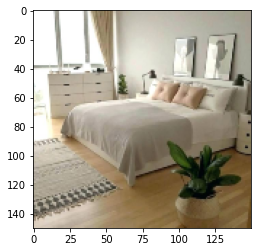

In [17]:
    import numpy as np
    from google.colab import files
    from keras.preprocessing import image
    import matplotlib.pyplot as plt
    import matplotlib.image as mpimg
    %matplotlib inline
     
    uploaded = files.upload()
     
    for fn in uploaded.keys():
     
      # predicting images
      path = fn
      img = image.load_img(path, target_size=(150,150))
      imgplot = plt.imshow(img)
      x = image.img_to_array(img)
      x = np.expand_dims(x, axis=0)
     
      images = np.vstack([x])
      classes = model.predict(images, batch_size=10)
      
      print(fn)
      if classes==0:
        print('clean')
      else:
        print('messy')